In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
movie_data=pd.read_csv('IMDb-Movies-India.csv', encoding='latin-1')

In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
pd.isnull(movie_data).sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
movie_data.dropna(inplace=True)
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:
movie_data.shape

(5659, 10)

In [7]:
movie_data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [8]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
movie_data.duplicated().any()

False

In [10]:
movie_data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [11]:
movie_data['Rating'].unique()

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

In [12]:
movie_data['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [13]:
genres = movie_data['Genre'].unique()
print(genres)

['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Action, Fantasy, Mystery'
 'Adventure, Drama, Mystery' 'Mystery, Thriller' 'Comedy, Crime, Drama'
 

In [14]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


### Average Ratings of Movies by Year

In [16]:
movie_data.groupby('Year')['Rating'].mean().sort_values(ascending=False)

Year
(1952)    7.212500
(1957)    7.080645
(1944)    7.075000
(1940)    7.050000
(1953)    6.955000
            ...   
(1995)    5.310937
(2002)    5.281111
(2003)    5.258772
(2000)    5.178313
(2004)    5.044954
Name: Rating, Length: 91, dtype: float64

### Data Visualization

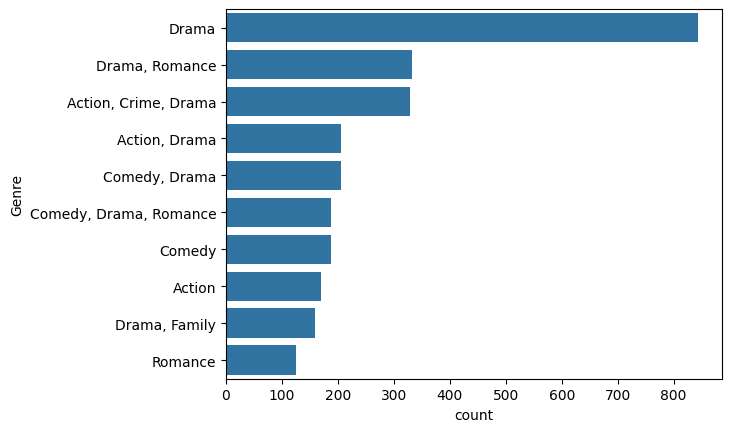

In [17]:
sns.countplot(y = movie_data['Genre'], order = movie_data['Genre'].value_counts().head(10).index)
plt.show()

In [18]:
year_count = movie_data.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()

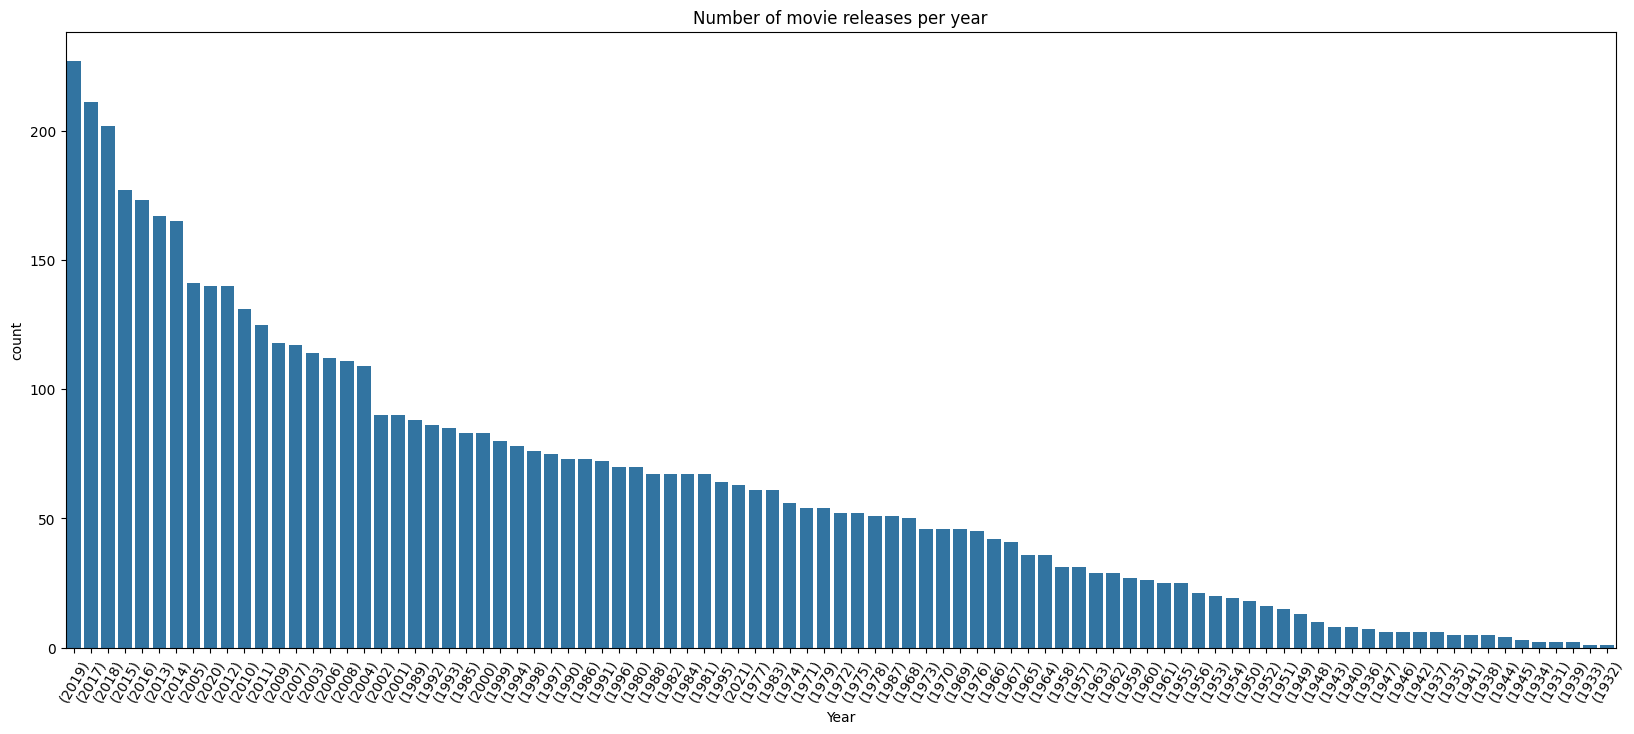

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=60)
plt.show()

In [20]:
top_rated=movie_data.nlargest(10,'Rating')[['Name','Rating']].set_index('Name')
print(top_rated)

                     Rating
Name                       
Love Qubool Hai        10.0
Half Songs              9.7
Gho Gho Rani            9.4
June                    9.4
The Reluctant Crime     9.4
Ashok Vatika            9.3
Baikunth                9.3
God of gods             9.3
Love Sorries            9.3
Refl3ct                 9.3


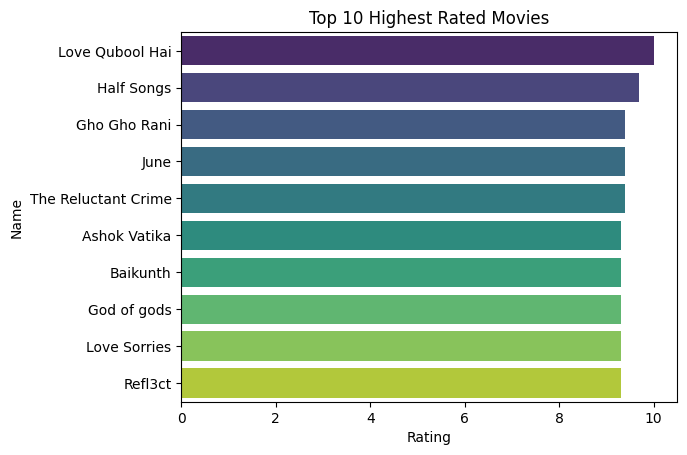

In [21]:
sns.barplot(x='Rating', y=top_rated.index, hue=top_rated.index, legend=False, data=top_rated, palette='viridis')
plt.title('Top 10 Highest Rated Movies')
plt.show()

In [22]:
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [23]:
movie_data.dtypes

Name         object
Year         object
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [24]:
top_dur=movie_data.nlargest(10,'Duration')[['Name','Duration']].set_index('Name')
print(top_dur)

                                    Duration
Name                                        
Gangs of Wasseypur                       321
Athidhi                                  300
LOC: Kargil                              255
Vidhyaarthi: The Power of Students       250
Janwar                                   247
Aasma: The Sky Is the Limit              240
Veera                                    240
Vivekananda                              240
Sangam                                   238
Taj Mahal: A Monument of Love            235


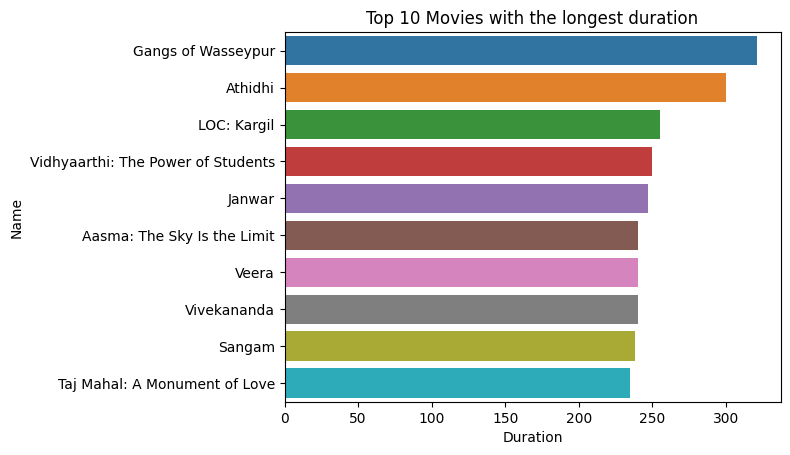

In [25]:
sns.barplot(x='Duration', y=top_dur.index, hue=top_dur.index, legend=False, data=top_dur)
plt.title('Top 10 Movies with the longest duration')
plt.show()

In [26]:
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'].str.replace(',', ''), errors='coerce')

In [27]:
top_voted=movie_data.nlargest(10,'Votes')[['Name','Votes']].set_index('Name')
print(top_voted)

                         Votes
Name                          
Life of Pi              591417
3 Idiots                357889
Lion                    220526
Gandhi                  220118
The Darjeeling Limited  185127
Like Stars on Earth     175810
PK                      168150
Dangal                  165074
Radhe                   162455
Dil Bechara             117377


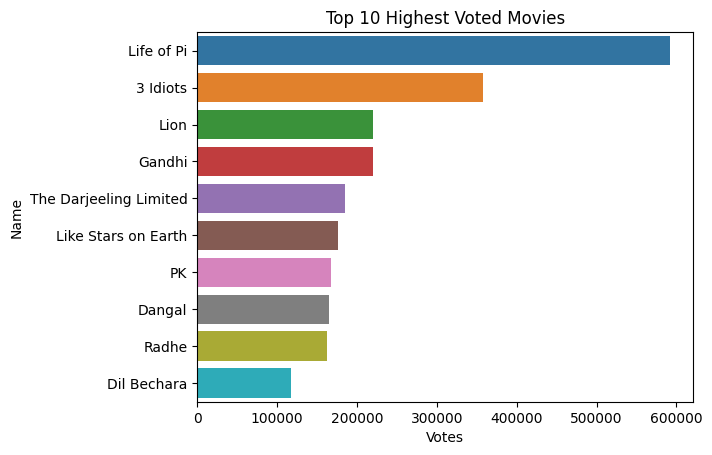

In [28]:
sns.barplot(x='Votes',y=top_voted.index, hue=top_voted.index, legend=False, data=top_voted)
plt.title('Top 10 Highest Voted Movies')
plt.show()

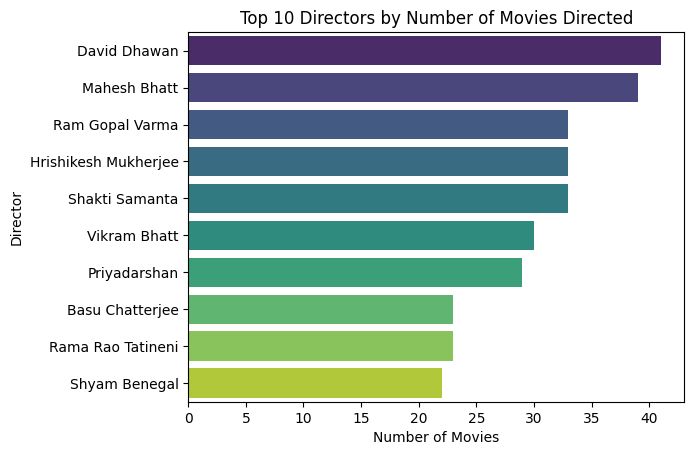

In [29]:
dir=movie_data['Director'].value_counts().reset_index()
dir.columns= ['Director', 'Number of Movies']
sns.barplot(x='Number of Movies', y= 'Director', hue='Director', data=dir.head(10), palette= 'viridis')
plt.title('Top 10 Directors by Number of Movies Directed')
plt.show()

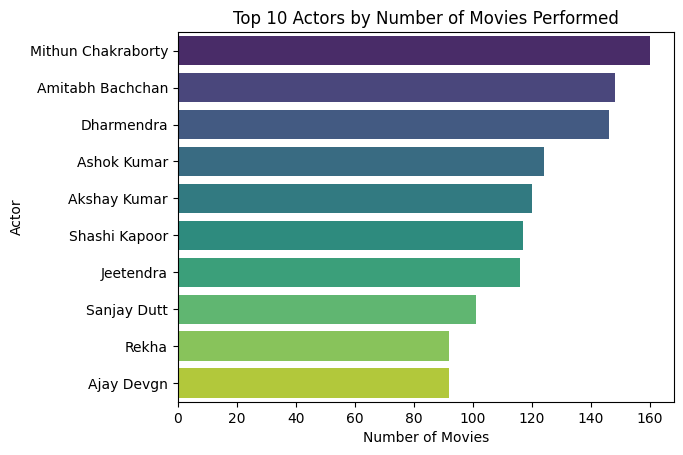

In [30]:
actors=pd.concat([movie_data['Actor 1'], movie_data['Actor 2'], movie_data['Actor 3']])
act=actors.value_counts().reset_index()
act.columns= ['Actor', 'Number of Movies']
sns.barplot(x='Number of Movies', y= 'Actor', hue='Actor', data=act.head(10), palette= 'viridis')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

In [31]:
movie_data.dtypes

Name         object
Year         object
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [32]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [33]:
movie_data['Year'] = movie_data['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [34]:
#Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = movie_data.groupby('Genre')['Rating'].transform('mean')
movie_data['Genre_mean_rating'] = genre_mean_rating 

movie_data['Director_encoded'] = movie_data.groupby('Director')['Rating'].transform('mean')
movie_data['Actor1_encoded'] = movie_data.groupby('Actor 1')['Rating'].transform('mean')
movie_data['Actor2_encoded'] = movie_data.groupby('Actor 2')['Rating'].transform('mean')
movie_data['Actor3_encoded'] = movie_data.groupby('Actor 3')['Rating'].transform('mean')


In [35]:
X = movie_data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = movie_data['Rating']

### Split the data into training and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training and testing

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.4825792183889356
Mean Squared Error: 0.4245437859355627
R-squared (R2) Score: 0.7707329592718972


### Scatter plot of actual vs. predicted ratings

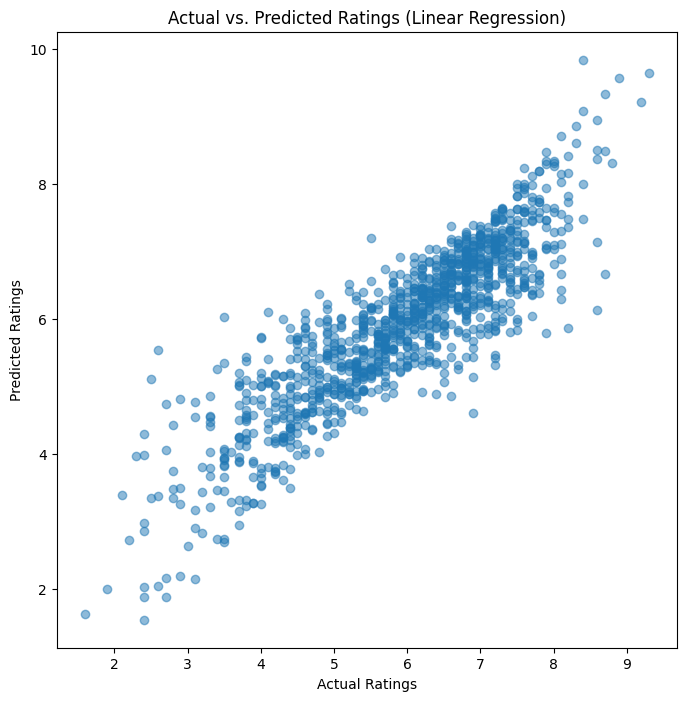

In [40]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings (Linear Regression)")
plt.show()
